In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/house_prices.csv")

In [ ]:
print(data.shape)

(1460, 81)


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data = data.drop("Id", axis=1) #since it will not play any imp role for us in getting the op

In [ ]:
data.shape

(1460, 80)

In [ ]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


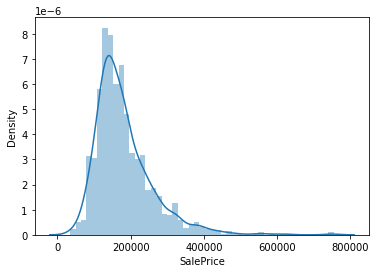

In [ ]:
sns.distplot(data['SalePrice'])

In [ ]:
#selected_variable= "GrLivArea"
# to see the relation between the given variable attribute and the target attribute
# scatter plot
#temp_data = pd.concat([data['SalePrice'], data['GrLivArea']], axis = 1)
vars = ['SalePrice', 'GrLivArea']
temp_data = data[vars]

In [ ]:
temp_data.head()

In [ ]:
temp_data.plot.scatter(x="GrLivArea",y="SalePrice")

In [ ]:
temp_data.plot(x="GrLivArea",y="SalePrice")

In [ ]:
vars = ['SalePrice', 'TotalBsmtSF']
temp_data = data[vars]
temp_data.plot.scatter(x="TotalBsmtSF",y="SalePrice")

In [ ]:
data.info()

In [ ]:
data['SaleCondition'].head(10)

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
5     Normal
6     Normal
7     Normal
8    Abnorml
9     Normal
Name: SaleCondition, dtype: object

In [ ]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
# relatiosnhip with categorical variables
data['OverallQual'].head(20)
data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [ ]:
# relationship betweeen quality and sale price 
# relationship between discrete and continous

In [ ]:
vars = ['OverallQual', "SalePrice"]
temp_df = data[vars]
temp_df.head()

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000


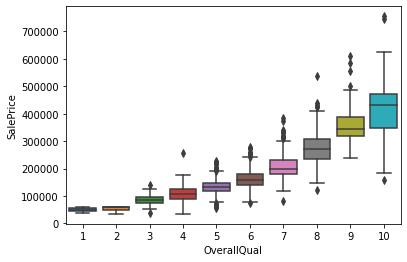

In [ ]:
sns.boxplot(x="OverallQual", y="SalePrice", data=temp_df)

In [ ]:
vars = ['YearBuilt', 'SalePrice']
temp_df = data[vars]
temp_df.head()

,YearBuilt,SalePrice
0,2003,208500
1,1976,181500
2,2001,223500
3,1915,140000
4,2000,250000


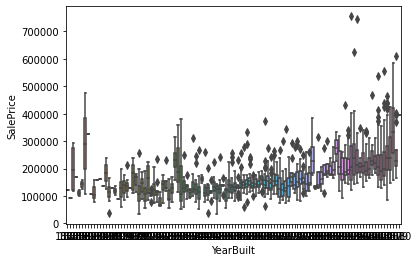

In [ ]:
sns.boxplot(x="YearBuilt",y="SalePrice", data= temp_df)

In [ ]:
#handling missing data
#Q1- how prevelant is the missing data
#Q2- Is the missing data random or does it have some pattern

In [ ]:
#midding data 
#find out the total counts of missing data in each attribute and then find percentage
total = data.isnull().sum().sort_values(ascending= False)
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percentage = percentage*100

In [ ]:
missing_data = pd.DataFrame({'Total Missisng Value Count': total, 'Percentage Misssing Value': percentage})
missing_data

,Total Missisng Value Count,Percentage Misssing Value
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


In [ ]:
filtered = missing_data[missing_data['Percentage Misssing Value'] >= 15]

In [ ]:
missing_data = missing_data.drop(["PoolQC","MiscFeature","Alley", "Fence","FireplaceQu","LotFrontage"],inplace=True )

In [ ]:
#Category 1- NA means not-present for these categorical variables - 'none'
#Category 2- Those features which can be filled with zero
#Category 3- Category with very few missing value can be replaced with mode(mosst frequent value)
#Category 4- Continous features which can be replaced by mean or median
#Category 5- NA with typ or typical functionality

In [ ]:
#Category 1
category_1_list = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
                      'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                      'BsmtFinType2',"MasVnrType",'MSSubClass']
for feature in category_1_list:
  print(feature)
  data[feature] = data[feature].fillna('None')

PoolQC
MiscFeature
Alley
Fence
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
MasVnrType
MSSubClass


In [ ]:
data['PoolQC'].head(10)

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: PoolQC, dtype: object

In [ ]:
#Category 2
category_2_list = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1',
                      'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
                      'BsmtHalfBath', "MasVnrArea"]
for feature in category_2_list:
  data[feature] = data[feature].fillna(0)

In [ ]:
#Category 3
category_3_list = ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd',
                     'SaleType','Utilities']
for feature in category_3_list:
  data[feature] = data[feature].fillna(data[feature].mode()[0])

In [ ]:
#Category 4
category_4_list = ["LotFrontage"]
for feature in category_4_list:
  data[feature] = data[feature].fillna(data[feature].median())

In [ ]:
#Category 5
data['Functional'] = data['Functional'].fillna('Typ')

In [ ]:
data.shape

(1460, 80)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
#1.Get all the  object data type
#2. Get all the col names in the list of step 1

In [ ]:
#We need to get all the categorical object columns
data_object = data.select_dtypes('object')
data_object_list = list(data_object.columns)

In [ ]:
#Label encoding 
#one hot encoding 

In [ ]:
#['cat','dog',cat','dog'] = [0,1,0,1] -label encoding 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
data_object.shape # 43 features of object type

(1460, 43)

In [ ]:
#3 applying onehot encoding on this 43 object dtype features

In [ ]:
ohe = OneHotEncoder()
data_encoded = ohe.fit_transform(data_object).toarray() #converts all the string values into the numeric values using one hot encoding

In [ ]:
#4 Retrive all the newly made column  names from onehot enccoding objetc

In [ ]:
data_encoded.shape

(1460, 266)

In [ ]:
data_encoded_features = ohe.get_feature_names(data_object_list)
print(data_encoded_features)

In [ ]:
numerical_features = data.select_dtypes(exclude='object')
data_encoded_features.shape

(266,)

In [ ]:
#numerical_features.head()

In [ ]:
#merging it all together
data_encoded_merged = pd.DataFrame(data_encoded, columns= data_encoded_features).astype(int)

In [ ]:
data_encoded_merged.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
numerical_features = data.select_dtypes(exclude='object')
#numerical features are sstored in 'numerical_features' and
#object (string) features are in stored in 'data_encoded_merged_

In [ ]:
final_data = pd.concat([numerical_features, data_encoded_merged],axis=1)

In [ ]:
final_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
final_data.shape

(1460, 303)

In [ ]:
features = final_data.drop('SalePrice', axis=1)
target = final_data[['SalePrice']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.75,random_state = 25)

In [ ]:
# xtrain.shape
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(1095, 302)
(1095, 1)
(365, 302)
(365, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Evaluate on Test set
from sklearn.metrics import r2_score

predictions = lr.predict(x_test)

#compare predictions and y_test and compute r-squared

r_squared_value = r2_score(y_test, predictions)
print(r_squared_value)


0.8579740359977075


In [ ]:
#building a model with random forest regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)#train 

In [ ]:
predictions = model.predict(x_test)

In [ ]:
#Evaluate on Test set
from sklearn.metrics import r2_score

predictions = model.predict(x_test)

#compare predictions and y_test and compute r-squared

r_squared_value = r2_score(y_test, predictions)
print(r_squared_value)

0.8178864784518449
